In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [41]:
heart=pd.read_csv(r'heart.csv')
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [43]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
x=heart.iloc[:,:-1]
y=heart["target"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
dt=DecisionTreeClassifierain()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred_dt = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366


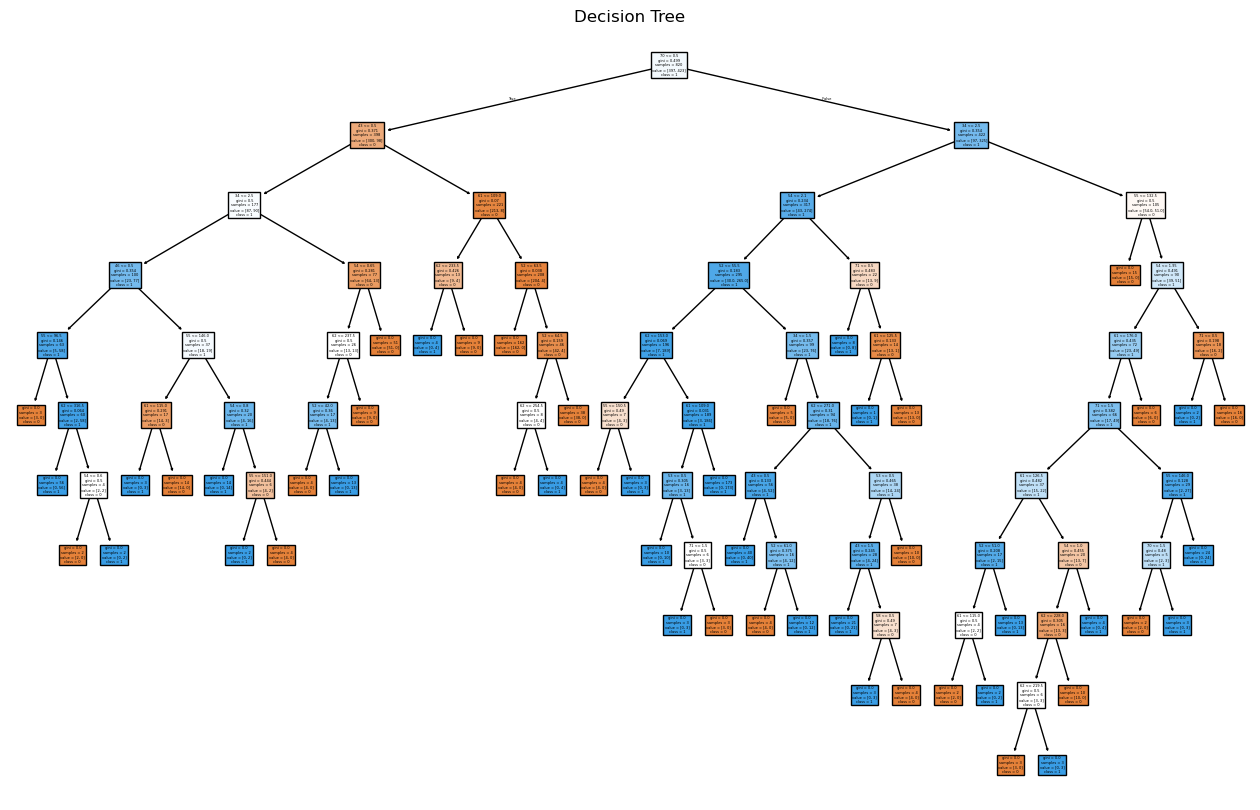

In [49]:
plt.figure(figsize=(16,10))
plot_tree(dt, filled=True, feature_names=x.age, class_names=["0", "1"])
plt.title("Decision Tree")
plt.show()

In [55]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(x_train, y_train)
y_pred_pruned = dt_pruned.predict(x_test)
print("Pruned Tree Accuracy (max_depth=4):", accuracy_score(y_test, y_pred_pruned))

Pruned Tree Accuracy (max_depth=4): 0.8


In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


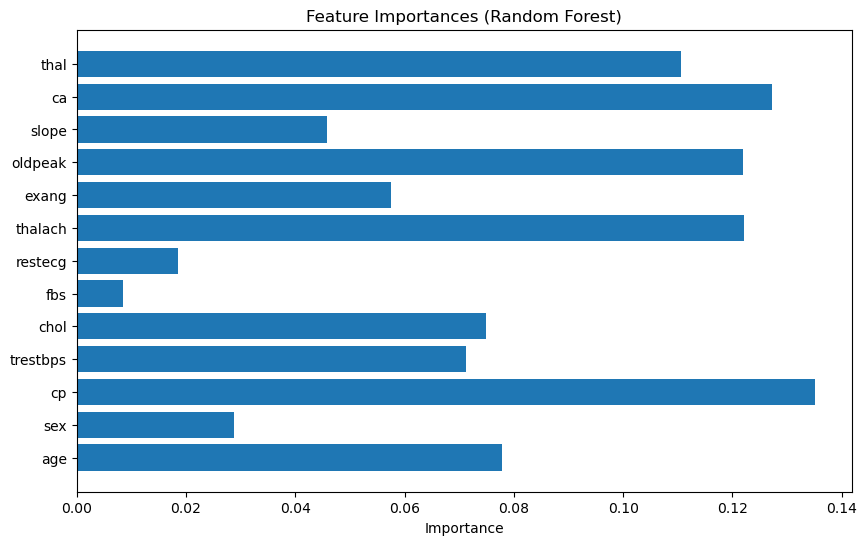

In [59]:
importances = rf.feature_importances_
features = x.columns
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()

In [61]:
cv_scores = cross_val_score(rf, x, y, cv=5)
print("Random Forest Cross-Validation Accuracy (5-fold):", cv_scores.mean())

Random Forest Cross-Validation Accuracy (5-fold): 0.9970731707317073
